<a href="https://colab.research.google.com/github/ajaythakur3369/INTERNSAVY-Internship/blob/main/Cricket_Player_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Cricket Player Performance Prediction**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - INTERNSAVY**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/INTERNSAVY-Internship)**

# **Problem Statement -**

Build a predictive model to forecast the performance of cricket players using machine learning

# **Let's Begin !**

In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Access the Drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
batsman_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/INTERNSAVY/File_Name/Cricket_dataset.csv")

In [ ]:
batsman_df.head(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [ ]:
batsman_df.shape

(11149, 13)

In [ ]:
batsman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
batsman_df.describe()

,Unnamed: 0,Player_ID
count,11149.00000,1.114900e+04
mean,5575.00000,2.259088e+05
std,3218.58341,1.942613e+05
min,1.00000,5.334000e+03
25%,2788.00000,4.749200e+04
50%,5575.00000,2.335140e+05
75%,8362.00000,3.217770e+05
max,11149.00000,1.158100e+06


In [ ]:
batsman_df.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [ ]:
batsman_df.dtypes

Unnamed: 0     int64
Bat1          object
Runs          object
BF            object
SR            object
4s            object
6s            object
Opposition    object
Ground        object
Start Date    object
Match_ID      object
Batsman       object
Player_ID      int64
dtype: object

In [ ]:
columns_to_replace = ['Runs', 'BF', 'SR', '4s', '6s']

In [ ]:
batsman_df[columns_to_replace] = batsman_df[columns_to_replace].replace('-', '0')
batsman_df[columns_to_replace] = batsman_df[columns_to_replace].apply(pd.to_numeric)

In [ ]:
batsman_df.head(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,0,0,0.0,0,0,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,0,0,0.0,0,0,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,0,0,0.0,0,0,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,0,0,0.0,0,0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,0,0,0.0,0,0,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


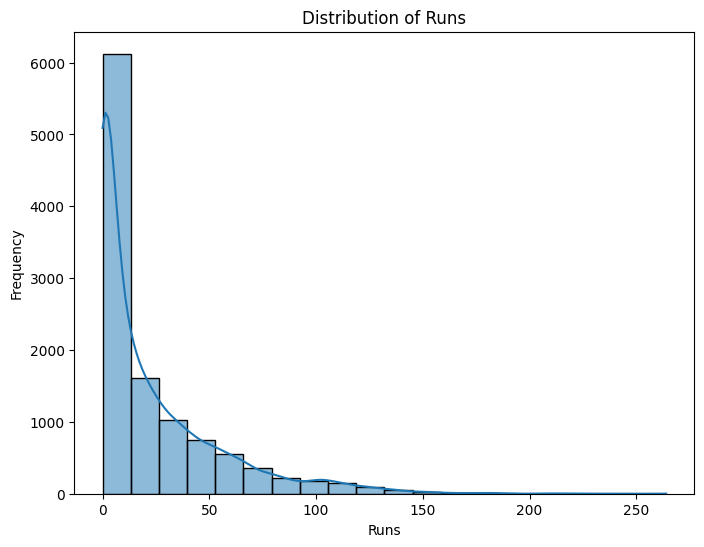

In [ ]:
plt.figure(figsize = (8, 6))
sns.histplot(batsman_df['Runs'], bins = 20, kde = True)
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

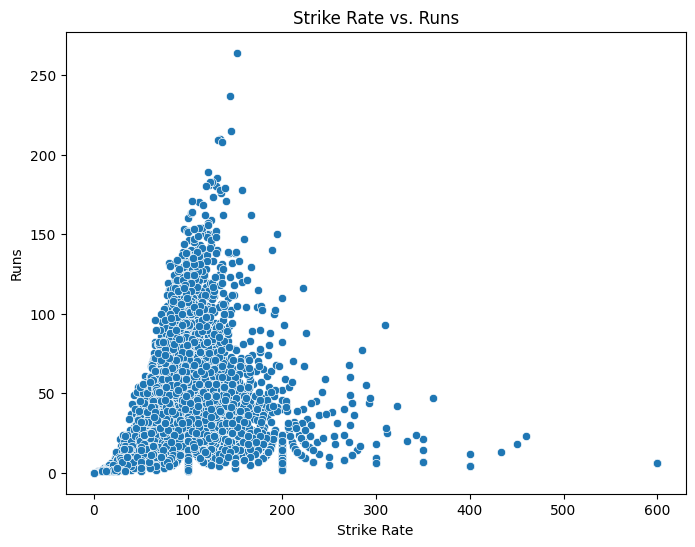

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'SR', y = 'Runs', data = batsman_df)
plt.title('Strike Rate vs. Runs')
plt.xlabel('Strike Rate')
plt.ylabel('Runs')
plt.show()

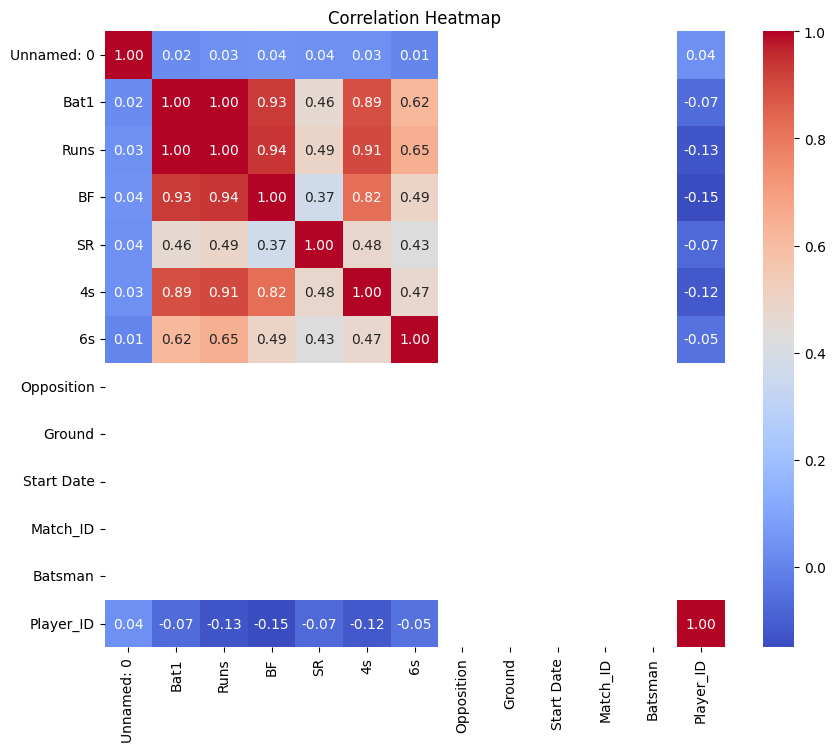

In [ ]:
# Replace non-numeric values with NaN
batsman_df = batsman_df.apply(pd.to_numeric, errors='coerce')

# Generate the correlation matrix
correlation_matrix = batsman_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

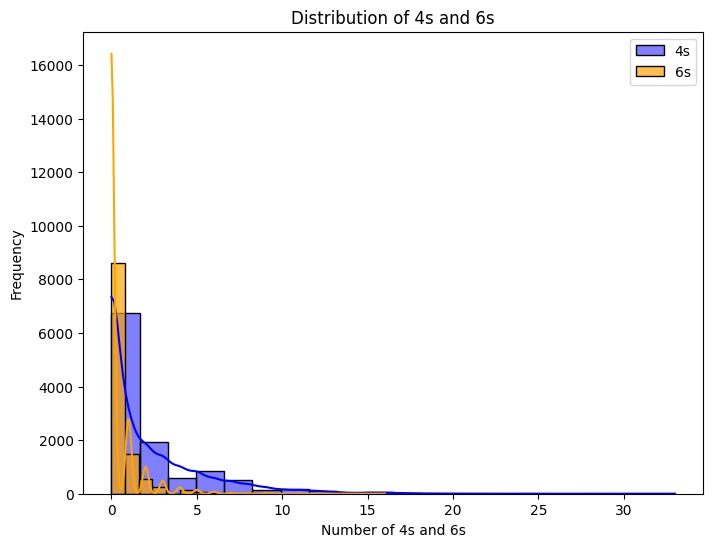

In [ ]:
plt.figure(figsize = (8, 6))
sns.histplot(batsman_df['4s'], bins = 20, kde = True, color = 'blue', label = '4s')
sns.histplot(batsman_df['6s'], bins = 20, kde = True, color = 'orange', label = '6s', alpha = 0.7)
plt.title('Distribution of 4s and 6s')
plt.xlabel('Number of 4s and 6s')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = batsman_df[['BF', 'SR', '4s', '6s']]
y = batsman_df['Runs']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1))

In [ ]:
svr_model = SVR(kernel = 'linear')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [ ]:
y_pred = svr_model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 27.30140134847944
R-squared: 0.9709500401633084


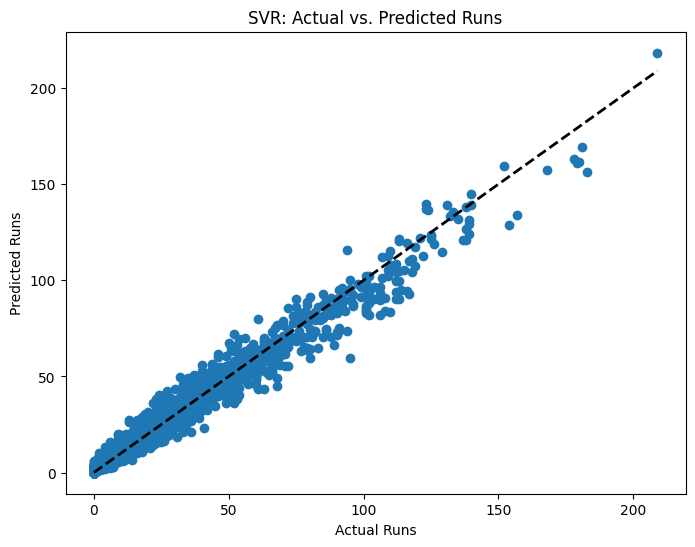

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(y_test_imputed, y_pred)
plt.plot([min(y_test_imputed), max(y_test_imputed)], [min(y_test_imputed), max(y_test_imputed)], 'k--', lw = 2)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('SVR: Actual vs. Predicted Runs')
plt.show()